# Ok Cupid Clustering Project

#### Question: Would it be possible to cluster people by their essay responses on OkCupid?

#### OkCupid provided data to Amherst students for their data science and stats course. The students used this data to answer some questions but I wanted to use it for NLP. (data found here: https://github.com/rudeboybert/JSE_OkCupid)

#### OkC has an algorithm to match people (https://ed.ted.com/lessons/inside-okcupid-the-math-of-online-dating-christian-rudder) but I wanted to see if I can group people by their essay responses. 

#### Methodology: I cleaned the text data and merged ten essay responses into one corpus. I then vectorized it and used two different ways to reduce dimensions (LDA and PCA) and tried three different clustering methods (KMeans, DBSCAN, and t-SNE).

In [74]:
# import libraries and load DF.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('profiles.csv')

In [75]:
# See the data
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [76]:
# quick describe
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [77]:
# see all the columns
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [187]:
count = df['location'].value_counts().nlargest(10)
count

san francisco, california    31064
oakland, california           7214
berkeley, california          4212
san mateo, california         1331
palo alto, california         1064
alameda, california            910
san rafael, california         755
hayward, california            747
emeryville, california         738
redwood city, california       693
Name: location, dtype: int64

In [195]:
# count NaN's
# it is interesting that age, income, status are all answered.

df.isna().sum()


age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

## Checking Number of Missing Questions

In [80]:
# I want to focus on essay responses. I want to see how many people answered all the essays.

essays = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
essay_list = []
essay_percentage = []

def essayCount(i):
    for i in essays:
        x = len(df['essay0'])-sum(df[i].notnull())
        essay_list.append(x)
    for i in essay_list:
        y = round(((i/59946)*100),2)
        essay_percentage.append(y)
        
essayCount(df['essay0'])

In [81]:
print('total number of questions:', len(df['essay0']))
print('missing questions %:', essay_percentage)


# get the total percentage of NaN's for each question.

total number of questions: 59946
missing questions %: [9.15, 12.63, 16.08, 19.14, 17.58, 18.1, 22.97, 20.77, 32.07, 21.02]


In [82]:
dictionary = dict(zip(essays, essay_list))

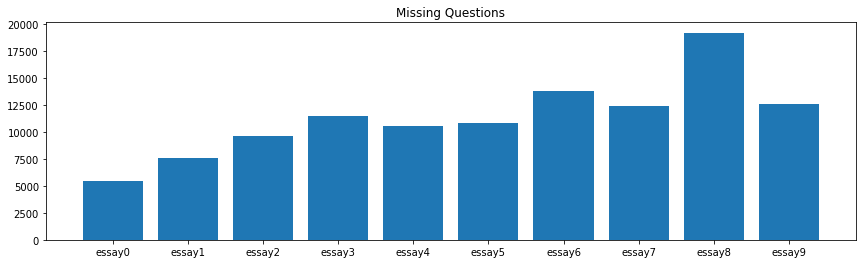

In [83]:
plt.bar(range(len(dictionary)), list(dictionary.values()), align='center')
plt.xticks(range(len(dictionary)), list(dictionary.keys()))
plt.subplots_adjust(right = 2)
plt.title("Missing Questions")

## Merging Essays into One Corpus

In [84]:
corpus_df = df.drop(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'height', 'income', 'job', 'last_online', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'], axis = 1)

In [85]:
corpus_df.head()

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...
1,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN


In [86]:
# I joined everything into one corpus because I can vectorize easily. Also, since some ppl left responses blank, aggregation is one way I can have some keywords for each id.

corpus_df['corpus'] = df[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']].astype(str).agg(''.join, axis=1)

In [87]:
corpus_df['corpus'].head()

0    about me:<br />\n<br />\ni would love to think...
1    i am a chef: this is what that means.<br />\n1...
2    i'm not ashamed of much, but writing public te...
3    i work in a library and go to school. . .readi...
4    hey how's it going? currently vague on the pro...
Name: corpus, dtype: object

## Use Regex to clean up HTML artifacts, backslash, and NaN rows

In [139]:
#regex
import re
# import natural language toolkit
import nltk
#beautiful soup
from bs4 import BeautifulSoup
#string for punctuation
import string
#stop word list
from nltk.corpus import stopwords
#import tokenizer
from nltk.tokenize import RegexpTokenizer
#import Lemmatizer
from nltk.stem import WordNetLemmatizer
#import stemmer
from nltk.stem.porter import PorterStemmer
#import html parser just in case BS4 doesn't work
import html.parser
# stop words
from nltk.corpus import stopwords

# gensim
from gensim.models                         import Doc2Vec
import gensim.models.doc2vec
from gensim                                import utils
from gensim.models.doc2vec                 import TaggedDocument, LabeledSentence
import gensim
from gensim                                import corpora, models
from gensim.test.utils                     import get_tmpfile

In [89]:
# before using regex, I'm going to drop all rows with all NaN essays.
na_list = corpus_df.corpus[corpus_df.corpus == "nannannannannannannannannannan"].index.tolist()

In [90]:
# corpus_df is now complete
corpus_df = corpus_df.drop(na_list)

In [91]:
corpus_df = corpus_df.astype(str)

## cleaned up /b and other html tags and punctuation/non-alphabet

In [92]:
# cleaned up </b> and other html tags but /n is still prevalent.
corpus_df = corpus_df.applymap(lambda text: BeautifulSoup(text, 'html.parser').get_text())

/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.youtube.com/watch?v=o1kdmnhyobg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.youtube.com/watch?v=imtdwizwedu" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/Users/q

/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.youtube.com/watch?v=o1kdmnhyobg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.youtube.com/watch?v=imtdwizwedu" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/qu

/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://imgsrc.hubblesite.org/hu/db/images/hs-1995-13-a-web.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.youtube.com/watch?v=zc

/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.youtube.com/watch?v=ovn9ywivexc" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.youtube.com/watch?v=yf_lwe6p-cg&amp;ob=av3e" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % mark

/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://soundcloud.com/sureno-love/kris-santiago-rnb-cookies" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.youtube.com/watch?v=41p8uxnedje&amp;ob=av2e" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautif

/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.youtube.com/watch?v=ufx3gqhirou&amp;ob=av2e" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.youtube.com/watch?v=xwwiwgw44tu" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.tumblr.com/blog/swine-time" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests t

/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.youtube.com/watch?v=s050_lhjqyi" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.youtube.com/watch?v=dlutfmv2izo" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.youtube.com/watch?v=7qftgswtvei" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get t

/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.youtube.com/watch?v=oaocwpcjsuc" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.youtube.com/watch?v=inbiarbujus&amp;ob=av2e" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_mar

/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.facebook.com/donchavishyuwuzme" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/queenbee/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should pro

In [93]:
# WRITE justification WHY i did it the 'comprehensive' way. 

# replaced \n
corpus_df['corpus'] = corpus_df['corpus'].map(lambda x: x.replace('\n', ' '))

# replace all nan's and removed apostrophe
corpus_df['corpus'] = corpus_df['corpus'].map(lambda x: x.replace('nan', ' '))
#removed apostrophe
corpus_df['corpus'] = corpus_df['corpus'].map(lambda x: x.replace("\'", ""))
#remove dashes
corpus_df['corpus'] = corpus_df['corpus'].map(lambda x: x.replace("-'", ""))
corpus_df['corpus'] = corpus_df['corpus'].map(lambda x: x.replace("--'", ""))
corpus_df['corpus'] = corpus_df['corpus'].map(lambda x: x.replace("='", ""))
#remove forward slash
corpus_df['corpus'] = corpus_df['corpus'].map(lambda x: x.replace("/", ""))
#remove periods
corpus_df['corpus'] = corpus_df['corpus'].map(lambda x: x.replace(".", " "))

#remove colon
corpus_df['corpus'] = corpus_df['corpus'].map(lambda x: x.replace(":", " "))

# remove comma
corpus_df['corpus'] = corpus_df['corpus'].map(lambda x: x.replace(",", " "))

# remove left parentheses
corpus_df['corpus'] = corpus_df['corpus'].map(lambda x: x.replace("(", " "))

#remove right parentheses
corpus_df['corpus'] = corpus_df['corpus'].map(lambda x: x.replace(")", " "))

#remove question marks
corpus_df['corpus'] = corpus_df['corpus'].map(lambda x: x.replace("?", " "))

#remove ! mark
corpus_df['corpus'] = corpus_df['corpus'].map(lambda x: x.replace("!", " "))

#remove semicolon marks
corpus_df['corpus'] = corpus_df['corpus'].map(lambda x: x.replace(";", " "))
# remove quotation marks
corpus_df['corpus'] = corpus_df['corpus'].map(lambda x: x.replace('"', " "))

# remove numbers
corpus_df['corpus'] = corpus_df['corpus'].str.replace('\d+', '')

In [ ]:
# create a for loop that counts characters to detect non-alphabetical and print the row that it's on.



In [94]:
corpus_list = corpus_df['corpus']

In [98]:
corpus_list

0        about me   i would love to think that i was so...
1        i am a chef  this is what that means    i am a...
2        im not ashamed of much  but writing public tex...
3        i work in a library and go to school     readi...
4        hey hows it going  currently vague on the prof...
                               ...                        
59941    vibrant  expressive  caring optimist  i love b...
59942    im nick  i never know what to write about myse...
59943    hello  i enjoy traveling  watching movies  and...
59944     all i have in this world are my balls and my ...
59945    is it odd that having a little  enemy  status ...
Name: corpus, Length: 57822, dtype: object

## Lemmatize and Stop Words

In [62]:
# w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
# lemmatizer = nltk.stem.WordNetLemmatizer()

# def lemmatize_text(text):
#     return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

# corpus_df['processed_text'] = corpus_df['corpus'].apply(lemmatize_text)


In [535]:
# # stop words

# stops = set(stopwords.words("english"))   
# corpus_df['processed_text'] = corpus_df['processed_text'].apply(lambda x: [item for item in x if item not in stops])

## TF-IDF for Vectorization

### some notes on TF-IDF:

 max_df: this is the maximum frequency within the documents a given feature can have to be used in the tfi-idf matrix. If the term is in greater than 80% of the documents it probably cares little meanining (in the context of film synopses)
 
  min_idf: this could be an integer (e.g. 5) and the term would have to be in at least 5 of the documents to be considered. Here I pass 0.2; the term must be in at least 20% of the document. I found that if I allowed a lower min_df I ended up basing clustering on names--for example "Michael" or "Tom" are names found in several of the movies and the synopses use these names frequently, but the names carry no real meaning.
  
  ngram_range: this just means I'll look at unigrams, bigrams and trigrams. See [n-grams](http://en.wikipedia.org/wiki/N-gram) 

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [50]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as its own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [99]:
tfidf = TfidfVectorizer(stop_words = "english", ngram_range = (1,3), max_df=0.8, min_df=0.2)

corpus_tfidf = tfidf.fit(corpus_list)

corpus_2d = pd.DataFrame(tfidf.transform(corpus_list).todense(),
                   columns = tfidf.get_feature_names(),)

In [152]:
tfidf_vec = tfidf.fit_transform(corpus_list)

In [100]:
corpus_2d.head()

,bay,best,better,big,book,books,city,cooking,day,doing,...,trying,tv,want,watching,way,work,working,world,years,youre
0,0.0,0.0,0.35039,0.000000,0.234927,0.082075,0.0,0.0,0.0,0.000000,...,0.102155,0.000000,0.336658,0.0,0.314484,0.081863,0.091395,0.000000,0.000000,0.0
1,0.0,0.0,0.00000,0.189292,0.000000,0.000000,0.0,0.0,0.0,0.193553,...,0.000000,0.201113,0.000000,0.0,0.000000,0.145796,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.00000,0.000000,0.103021,0.000000,0.0,0.0,0.0,0.000000,...,0.089595,0.099039,0.000000,0.0,0.091939,0.000000,0.080157,0.087955,0.182865,0.0
3,0.0,0.0,0.00000,0.000000,0.000000,0.307974,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.307179,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.00000,0.000000,0.000000,0.156741,0.0,0.0,0.0,0.000000,...,0.000000,0.215652,0.000000,0.0,0.000000,0.625344,0.000000,0.000000,0.000000,0.0


## Reduce Dimension using PCA

### great tidbit on PCA for more info: https://medium.com/machine-learning-researcher/dimensionality-reduction-pca-and-lda-6be91734f567

In [102]:
# how much variance is in each PC? Should be a function.
# does it automatically scale variables?

from sklearn.decomposition import PCA

pca = PCA(n_components = 2).fit(corpus_2d)
corpus_2d = pca.transform(corpus_2d)
corpus_2d

array([[-0.09293655,  0.15549784],
       [-0.05483524,  0.03100336],
       [ 0.17701955,  0.2283881 ],
       ...,
       [-0.19772874, -0.06192028],
       [-0.24942173,  0.0359736 ],
       [ 0.29643522, -0.11016989]])

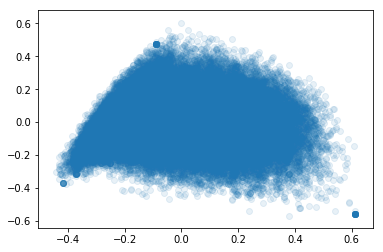

In [103]:
# visualize PCA

plt.scatter(corpus_2d[:,0], corpus_2d[:,1], alpha = .1)
plt.show()  

In [104]:
#dataframe
corpus_2d_df = pd.DataFrame(corpus_2d)
corpus_2d_df.head()

,0,1
0,-0.092937,0.155498
1,-0.054835,0.031003
2,0.177020,0.228388
3,-0.210774,-0.034346
4,-0.179461,-0.166306


In [105]:
from sklearn.cluster import KMeans, DBSCAN

## Method 1: DBSCAN

In [106]:
db = DBSCAN(eps=0.005, min_samples= 7).fit(corpus_2d)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [107]:
# create a labels class for visualization
corpus_2d_df['db_labels'] = db.labels_

In [108]:
# Number of clusters in labels, ignoring noise if present.

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# convert array into dataframe
sample_df = pd.DataFrame(corpus_2d)

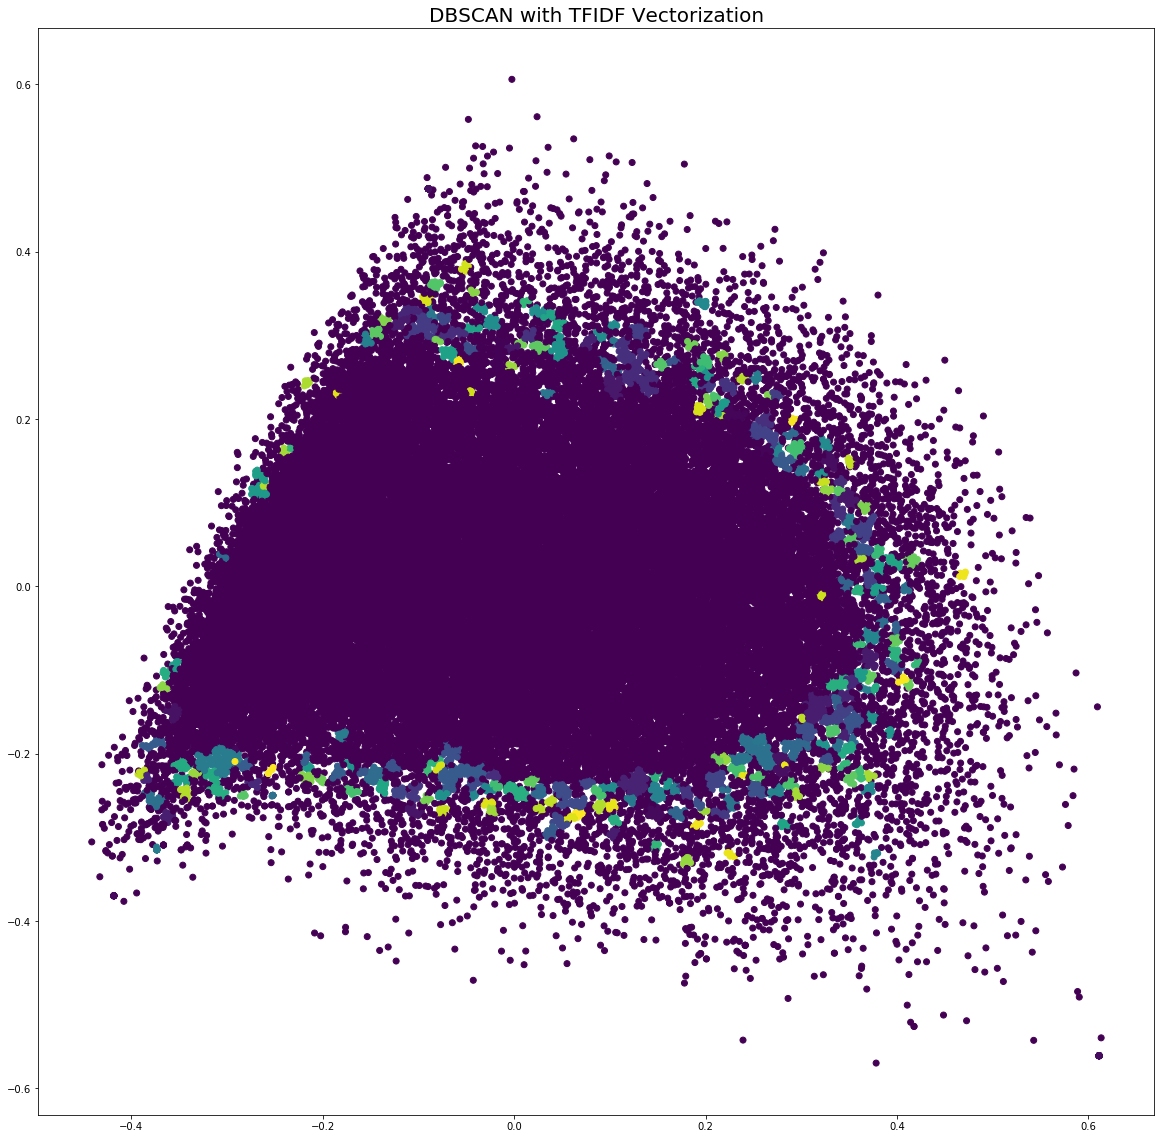

In [109]:
# Visualize DBSCAN with epsilon = 0.2, min_samples = 10:
# The grouping isn't too useful. Let's try KMEANS

fig = plt.figure(figsize=(20,20))
plt.scatter(sample_df[0], sample_df[1], c = db.labels_)
plt.title("DBSCAN with TFIDF Vectorization", fontsize = 20)

## DBSCAN Review:

The clusters are not too useful and doesn't provide much insights. I could play around with the parameters some more but I think having a manual control might yield better results. 

## Method 2: KMeans 10 to Cluster

In [110]:
kmeans_10 = KMeans(n_clusters = 10)
model_10 = kmeans_10.fit(corpus_2d) 
clusters_10 = model_10.cluster_centers_ 
centroids_10 = pd.DataFrame(clusters_10)

In [111]:
# apply class by distance 
corpus_2d_df['nearest_10'] = corpus_2d_df.apply(lambda x: np.linalg.norm(centroids_10.sub(x[[0,1]]), axis =1).argmin(), axis = 1)

In [112]:
kmeans10_cluster_one = corpus_2d_df[corpus_2d_df['nearest_10'] == 1].index

IndexError: index 10 is out of bounds for axis 0 with size 10

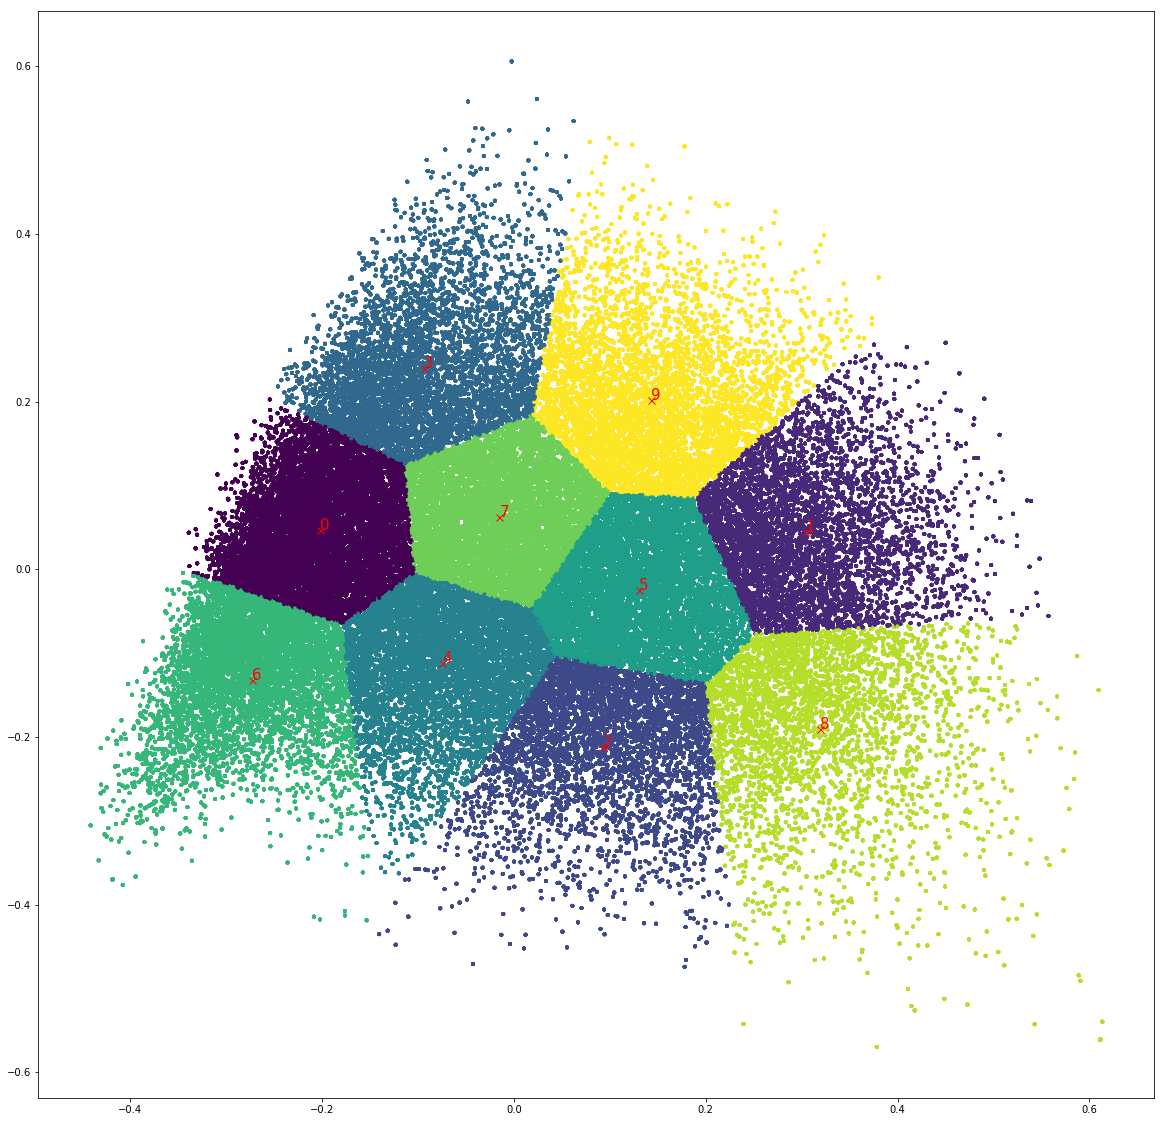

In [123]:
plt.figure(figsize=(20,20))

for i in range(0, 10000):
    
    # scatter plot of samples
    
    cluster = corpus_2d_df[corpus_2d_df['nearest_10'] == i]
    plt.scatter(corpus_2d_df[0],corpus_2d_df[1], s=8, c= corpus_2d_df['nearest_10'])
    
    centroid = kmeans_10.cluster_centers_[i]
    
    # plot centroid
    plt.plot(centroid[0], centroid[1], marker='x', markersize=7, color='red', label = corpus_2d_df['nearest_10'])
    plt.annotate(str(i),centroid,size=15, color = 'red')

## Method 2.1: KMeans 20

In [126]:
kmeans_20 = KMeans(n_clusters = 20)
model_20 = kmeans_20.fit(corpus_2d) 
clusters_20 = model_20.cluster_centers_ 
centroids_20 = pd.DataFrame(clusters_20)

In [133]:
# apply class by distance 
corpus_2d_df['nearest_20'] = corpus_2d_df.apply(lambda x: np.linalg.norm(centroids_20.sub(x[[0,1]]), axis =1).argmin(), axis = 1)

In [134]:
kmeans20_cluster_one = corpus_2d_df[corpus_2d_df['nearest_20'] == 1].index 

IndexError: index 20 is out of bounds for axis 0 with size 20

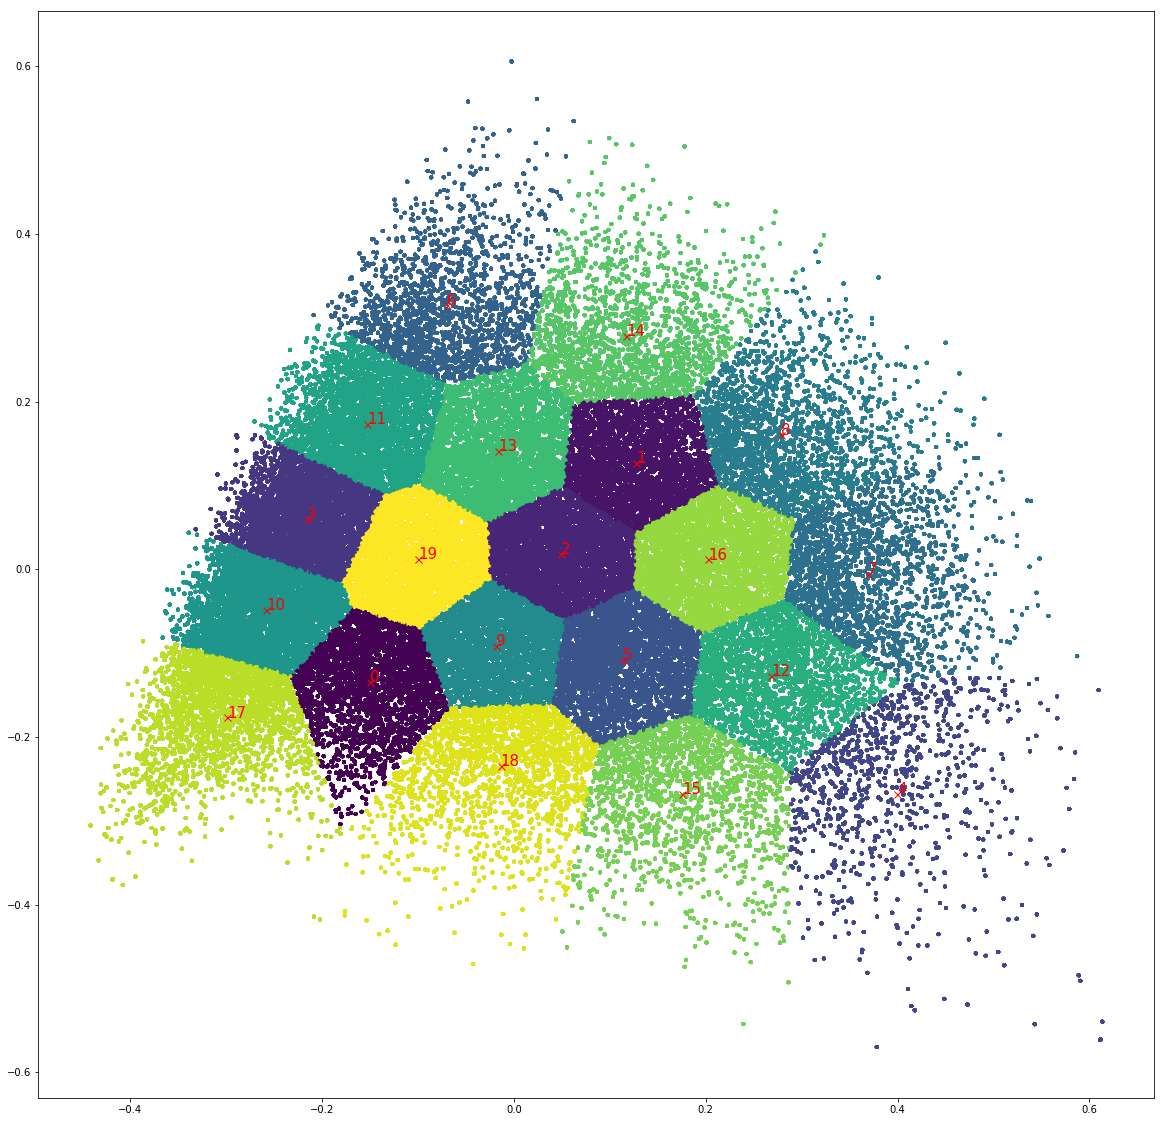

In [135]:
# kmeans 20 on corpus_2d_df

plt.figure(figsize=(20,20))

for i in range(0, 10000):
    
    # scatter plot of samples
    cluster = corpus_2d_df[corpus_2d_df['nearest_20'] == i]
    plt.scatter(corpus_2d_df[0],corpus_2d_df[1], s=8, c= corpus_2d_df['nearest_20'])
    
    # centroid is kmeans center
    centroid = kmeans_20.cluster_centers_[i]
    
    # plot centroid
    plt.plot(centroid[0], centroid[1], marker='x', markersize=7, color='red', label = corpus_2d_df['nearest_20'])
    plt.annotate(str(i),centroid,size=15, color = 'red')

### Groups a lot better than DBSCAN

## Used Doc2Vec just for kicks to see how it clusters. (Heuristic check)

In [197]:
# Transform pre-processed essays into a list 

with open('OKC.txt') as f:
    data = f.readlines()
    
doc2vec_data = []
for line in data:
    doc2vec_data.append(line)

len(doc2vec_data) # check everything was transformed correctly.

57822

In [137]:
# write another text file from doc2vec_data list

File = open('doc2vec_data.txt', 'w')

for item in doc2vec_data:
    File.write('%s' % item)

In [140]:
#Initialize and train model

sentences = gensim.models.doc2vec.TaggedLineDocument('doc2vec_data.txt')
model = gensim.models.doc2vec.Doc2Vec(sentences, size = 200, window = 10, min_count = 5, iter = 50, workers = 5)

/Users/queenbee/anaconda3/lib/python3.6/site-packages/gensim/models/doc2vec.py:566: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/Users/queenbee/anaconda3/lib/python3.6/site-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [141]:
# Check most similar questions

sims = model.docvecs.most_similar(37)

print(sims)

[(46163, 0.3866121172904968), (16095, 0.38644805550575256), (8926, 0.3862273097038269), (38520, 0.38306039571762085), (42659, 0.37519800662994385), (18969, 0.3747549057006836), (21025, 0.3718985319137573), (7233, 0.370292603969574), (18035, 0.36573681235313416), (33544, 0.36355119943618774)]


/Users/queenbee/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [145]:
print('essay respondant:', corpus_list.iloc[37])
for i in sims:
    print('most similar respondant', i[0],":" , corpus_list.iloc[i[0]])

essay respondant: why  hello there   im entertaining the thought that i could come across someone just as equally rad  bodacious and fun who blows my mind and our exchange develops into something too good for words  im a riot with a good heart   oakland made me  the east bay raised me  lived in vegas  the silicon valley catapulted my career  and now i am planting seeds in sf near ish  my home in walnut creek   ive learned enough of my mothers native lingo to find my way back to the beach and enough exotic languages to fall in love  im visual  a soulful vocalist  a believer in exploring passions  positive action  and celebrating often  i know when to fold and when to raise  i set my own standard  im well-loved by my diverse family and friends  i have no enemies but time  entj  i love dancing and how sexy you look in a fedora and dark shades  i love me some super high heels just as much as my daisy dukes and rugged boots when i rough it with my dogs  i love to explore  so pack yer bags d

## Doc2Vec Thoughts:
People's essays look similar and I can see them going out on a date! However, retrospectively, I should've split the group by F/M because I think some essays are written by the same genders.

## LDA Visualization w/ T-SNE

In [147]:
from sklearn.decomposition import LatentDirichletAllocation

In [153]:
lda_model = LatentDirichletAllocation()
X_topics = lda_model.fit_transform(tfidf_vec)

/Users/queenbee/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [155]:
#TSNE
from sklearn.manifold import TSNE

In [156]:
# HEADS UP! This will take a long time.

tsne_model = TSNE(n_components=2, verbose=0, random_state=0, angle=.99, init='pca')

tsne_lda = tsne_model.fit_transform(X_topics)

In [157]:
tsne_lda_df = pd.DataFrame(tsne_lda)
len(tsne_lda_df)

57822

In [158]:
lda_keys = []
for i in range(X_topics.shape[0]):
    lda_keys +=  X_topics[i].argmax(),

len(lda_keys)

57822

In [160]:
# create dataframe for lda_keys

lda_keys_df = pd.DataFrame(lda_keys)
lda_keys_df = lda_keys_df.rename(columns = {0: 'class'})

In [161]:
# merge tsne_lda_df with the likely topic for each question:

tsne_lda_df = pd.concat([tsne_lda_df, lda_keys_df], axis=1)
tsne_lda_df.head()

,0,1,class
0,59.916946,13.961967,7
1,-40.972363,-37.657829,6
2,-19.542883,-64.870331,9
3,45.343014,20.047569,2
4,-12.305326,47.352020,8


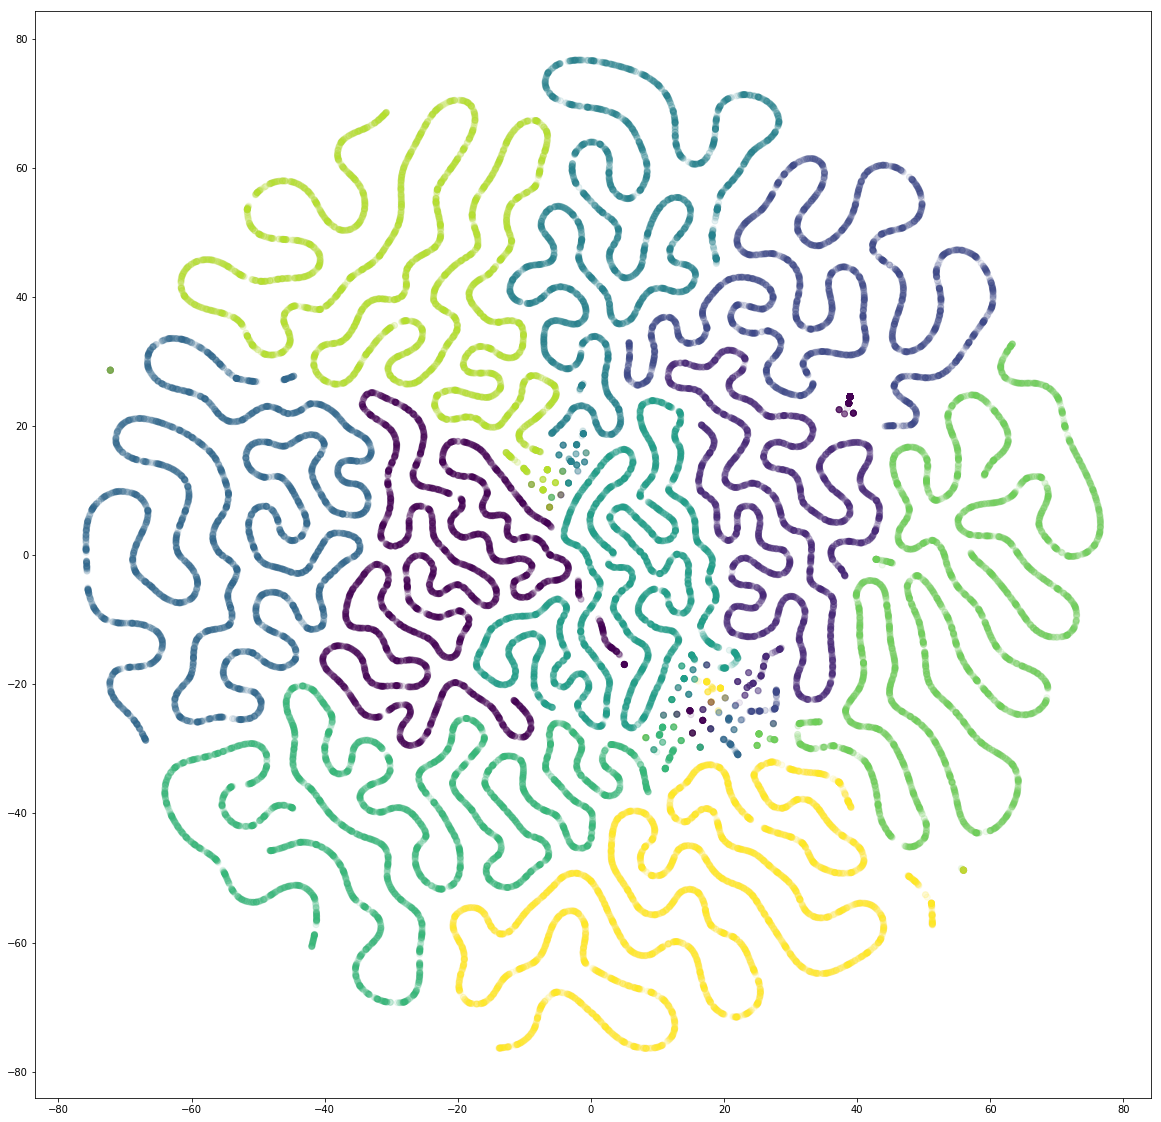

In [162]:
fig = plt.figure(figsize=(20,20))
plt.scatter(tsne_lda_df[0], tsne_lda_df[1], alpha = 0.1, c = tsne_lda_df['class'])

## Heuristic Check for t-SNE

In [174]:
indexed = tsne_lda_df[tsne_lda_df['class'] == 9].index

for i in indexed:
    print(corpus_list.iloc[i])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




its a beautiful saturday morning in the mission  am and im still in bed  in a moment  ill get up  make some eggs and coffee  then ill pack up the laptop  book  and climbing shoes  jump on my  bike]]  ride     somewhere  the rest of the day will be spent drinking  more  [coffee  writing code  editing photos  climbing at the gym  hopefully catching up with some friends or playing guitar in the park  later ill be in the haight drinking with neuroscientists  tomorrow is yoga and homemade pizza    update   ive been inducted into the ways of the alemany farmers market on saturday morning  you should replace references to  saturday  in the above paragraph with  sunday    i love this town   ive lived here three years now and have collected a fantastic group of friends  people that challenge me in every conceivable way  from scrabble to ethics  fashion to politics  we schmooze  we ride bikes  we climb rocks  we drink fancy beer  we wander in the woods and the mountains   i enjoy expanding that

## t-SNE and Concluding Thoughts:
This method's clustering looks great! Looks like people here are pretty sporty and athletic.

In general, I think OkCupid's method of matching people by asking direct questions and weighing them by 'not important, 'somewhat important', and 'very important' is better than grouping by keywords. However, this project shows that it's not impossible and it could be a valid way as well. 

Results would be better if people had less typos in their responses and answered all questions. 